In [1]:
import numpy as np
import sklearn as sk
import math
import statistics
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from statsmodels.formula.api import logit
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import ClusterCentroids
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [28]:
#1
credit_df=pd.read_csv('Credit_card.csv')
label_df=pd.read_csv('Credit_card_label.csv')
credit_df['label']=label_df['label']
credit_df
credit_df['label'].value_counts()

label
0    1373
1     175
Name: count, dtype: int64

In [3]:
cor_df=credit_df.copy()

In [4]:
cor_df['GENDER']=cor_df['GENDER'].astype('category').cat.codes
cor_df['Car_Owner']=cor_df['Car_Owner'].astype('category').cat.codes
cor_df['Propert_Owner']=cor_df['Propert_Owner'].astype('category').cat.codes

In [5]:
cor_df['Marital_status']=cor_df['Marital_status'].map(lambda x: 1 if 'Single / not married' in x
                                                      else 2 if 'Separated' in x
                                                      else 3 if 'Widow' in x
                                                      else 4 if 'Civil marriage' in x
                                                      else 5 if 'Married' in x
                                                      else 5)

In [6]:
cor_df['Type_Income']=cor_df['Type_Income'].map(lambda x: 1 if 'Pensioner' in x
                                                else 2 if 'State servant' in x
                                                else 3 if 'Working' in x
                                                else 4 if 'Commercial associate' in x
                                                else 3)

In [7]:
cor_df['EDUCATION']=cor_df['EDUCATION'].map(lambda x: 1 if 'Lower secondary' in x
                                            else 2 if 'Secondary / secondary special' in x
                                            else 3 if 'Incomplete higher' in x
                                            else 4 if 'Higher education' in x
                                            else 5 if 'Academic degree' in x
                                            else 2 in x)

In [8]:
cor_df['Housing_type']=cor_df['Housing_type'].map(lambda x: 1 if 'With parents' in x
                                                  else 2 if 'Municipal apartment' in x
                                                  else 3 if 'Rented apartment' in x
                                                  else 4 if 'Co-op apartment' in x
                                                  else 5 if 'Office apartment' in x
                                                  else 6 if 'House / apartment' in x
                                                  else 6)

In [9]:
cor_df['Type_Occupation']=cor_df['Type_Occupation'].astype(str)
cor_df['Type_Occupation']=cor_df['Type_Occupation'].map(lambda x: 1 if 'Low-skill Laborers' in x
                                                        else 2 if 'Waiters/barmen staff' in x
                                                        else 3 if 'Cleaning staff' in x
                                                        else 4 if 'Drivers' in x
                                                        else 5 if 'Cooking staff' in x
                                                        else 6 if 'Private service staff' in x
                                                        else 7 if 'Realty agents' in x
                                                        else 8 if 'Security staff' in x
                                                        else 9 if 'Laborers' in x
                                                        else 10 if 'Sales staff' in x
                                                        else 11 if 'Secretaries' in x
                                                        else 12 if 'IT staff' in x
                                                        else 13 if 'HR staff' in x
                                                        else 14 if 'Accountants' in x
                                                        else 15 if 'Medicine staff' in x
                                                        else 16 if 'High skill tech staff' in x
                                                        else 17 if 'Core staff' in x
                                                        else 18 if 'Managers' in x
                                                        else 9)

In [10]:
cor_df['Annual_income']=cor_df['Annual_income'].fillna(135000)

In [11]:
cor_df['Birthday_count']=cor_df['Birthday_count'].fillna(-16040.342070773264)

In [12]:
cor_df.drop('Mobile_phone', axis=1, inplace=True)

In [13]:
cor_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,1,1,1,0,180000.0,1,4,5,6,-18772.000000,365243,0,0,0,9,2,1
1,5009744,0,1,0,0,315000.0,4,4,5,6,-13557.000000,-586,1,1,0,9,2,1
2,5009746,0,1,0,0,315000.0,4,4,5,6,-16040.342071,-586,1,1,0,9,2,1
3,5009749,0,1,0,0,135000.0,4,4,5,6,-13557.000000,-586,1,1,0,9,2,1
4,5009752,0,1,0,0,315000.0,4,4,5,6,-13557.000000,-586,1,1,0,9,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0,135000.0,4,4,5,6,-11957.000000,-2182,0,0,0,18,2,0
1544,5023655,0,0,0,0,225000.0,4,3,1,6,-10229.000000,-1209,0,0,0,14,1,0
1545,5115992,1,1,1,2,180000.0,3,4,5,6,-13174.000000,-2477,0,0,0,18,4,0
1546,5118219,1,1,0,0,270000.0,3,2,4,6,-15292.000000,-645,1,1,0,4,2,0


In [14]:
#everything before this was just copied from assignment 6
#still have very little clue as to what the birthday_count column means but I figured they should at least be positive
def make_positive(column: pd.Series) -> pd.Series:
    positive_column = column.abs()
    return positive_column
cor_df['Birthday_count'] = make_positive(cor_df['Birthday_count'])

In [15]:
#since 365243 was the most common answer but also over a thousand years, I decided to replace it with the median
#It also made no sense for this column to have nagetives so I could only assume that the absolute value of the rest
#of the numbers was at least correct and they just had the wrong sign(otherwise we might as well just scrap the column)
def replace_outliers(column: pd.Series, outlier_value: int) -> pd.Series:
    median_value = column.median()
    column = column.replace(outlier_value, median_value)
    return column
cor_df['Employed_days'] = replace_outliers(cor_df['Employed_days'], 365243)
#use the make positive function from earlier
cor_df['Employed_days'] = make_positive(cor_df['Employed_days'])

In [16]:
cor_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,1,1,1,0,180000.0,1,4,5,6,18772.000000,1565,0,0,0,9,2,1
1,5009744,0,1,0,0,315000.0,4,4,5,6,13557.000000,586,1,1,0,9,2,1
2,5009746,0,1,0,0,315000.0,4,4,5,6,16040.342071,586,1,1,0,9,2,1
3,5009749,0,1,0,0,135000.0,4,4,5,6,13557.000000,586,1,1,0,9,2,1
4,5009752,0,1,0,0,315000.0,4,4,5,6,13557.000000,586,1,1,0,9,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0,135000.0,4,4,5,6,11957.000000,2182,0,0,0,18,2,0
1544,5023655,0,0,0,0,225000.0,4,3,1,6,10229.000000,1209,0,0,0,14,1,0
1545,5115992,1,1,1,2,180000.0,3,4,5,6,13174.000000,2477,0,0,0,18,4,0
1546,5118219,1,1,0,0,270000.0,3,2,4,6,15292.000000,645,1,1,0,4,2,0


In [17]:
#2 original for KNN
X = cor_df.drop('label', axis = 1)
y = cor_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32, stratify=y)
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print(y_predict)
print(type(y_predict))
print(knn.score(X_test, y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
<class 'numpy.ndarray'>
0.886021505376344


In [18]:
#oversampled
def oversample_and_predict(X_train, y_train, X_test, y_test):
    ros = RandomOverSampler(random_state=32)
    X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
    
    knn = KNeighborsClassifier(n_neighbors=13)
    knn.fit(X_resampled, y_resampled)
    
    y_predict = knn.predict(X_test)
    
    print("Predictions:", y_predict)
    print("Data type of predictions:", type(y_predict))
    accuracy = knn.score(X_test, y_test)
    print("Accuracy:", accuracy)
    
    return accuracy
accuracy = oversample_and_predict(X_train, y_train, X_test, y_test)

Predictions: [0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0
 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0
 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0
 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1
 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1
 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
Data type of predictions: <class 'numpy.nda

In [19]:
#undersampled
def undersample_and_predict(X_train, y_train, X_test, y_test):
    rus = ClusterCentroids(random_state=32)
    X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
    
    knn = KNeighborsClassifier(n_neighbors=13)
    knn.fit(X_resampled, y_resampled)
    
    y_predict = knn.predict(X_test)
    
    print("Predictions:", y_predict)
    print("Data type of predictions:", type(y_predict))
    accuracy = knn.score(X_test, y_test)
    print("Accuracy:", accuracy)
    
    return accuracy
accuracy = undersample_and_predict(X_train, y_train, X_test, y_test)

Predictions: [0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1
 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1
 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0
 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1
 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0
 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1
 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1
 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0
 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1
 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0
 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1
 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1
 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0]
Data type of predictions: <class 'numpy.nda

In [20]:
# original for logisitc regression
X = cor_df.drop('label', axis = 1)
y = cor_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32, stratify=y)
model = LogisticRegression()
model.fit(X_train, y_train)
accuracy_score1 = model.score(X_test, y_test)
print('accuracy: ', accuracy_score1)

accuracy:  0.886021505376344


In [21]:
#oversampled
def oversampled_accuracy(X_train, y_train, X_test, y_test):
    ros = RandomOverSampler(random_state=32)
    X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
    
    model = LogisticRegression()
    model.fit(X_resampled, y_resampled)
    
    accuracy = model.score(X_test, y_test)
    
    return accuracy

X = cor_df.drop(columns=['label'])
y = cor_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

accuracy = oversampled_accuracy(X_train, y_train, X_test, y_test)

print('Accuracy:', accuracy)

Accuracy: 0.5268817204301075


c:\users\brady\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
#undersampled
def undersampled_accuracy(X_train, y_train, X_test, y_test):
    rus = ClusterCentroids(random_state=32)
    X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
    
    model = LogisticRegression()
    model.fit(X_resampled, y_resampled)
    
    accuracy = model.score(X_test, y_test)
    
    return accuracy

X = cor_df.drop(columns=['label'])
y = cor_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

accuracy = undersampled_accuracy(X_train, y_train, X_test, y_test)

print('Accuracy:', accuracy)

Accuracy: 0.4731182795698925


c:\users\brady\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
#as we can see in both the knnn and logistic regression results, oversampling and undersampling decrease the accuracy of both tests by a lot.
#although I did both over and undersampling, I thought undersampling would be more helpful since I was looking to bring up the number of 0s but this
#actually made it much worse, even worse than oversampling

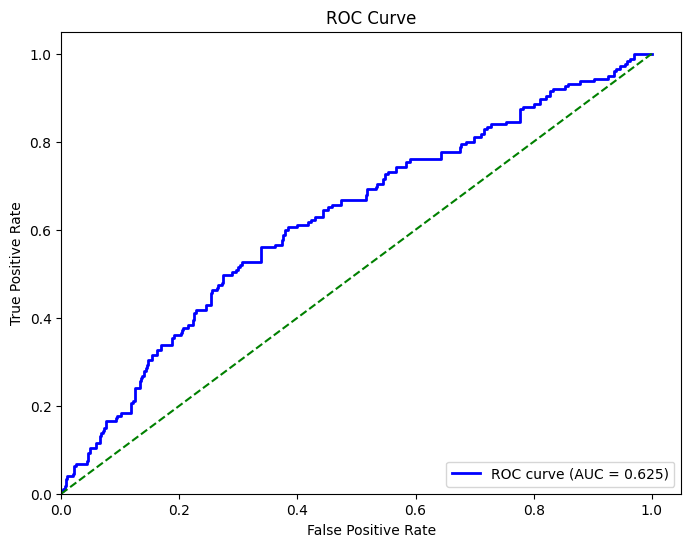

In [24]:
#3
def plot_roc_curve(y_true, predicted_scores):
    fpr, tpr, thresholds = roc_curve(y_true, predicted_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

predicted_probs = model.predict_proba(cor_df.drop(columns=['label']))[:, 1]
y_true = cor_df['label'] 
predicted_scores = predicted_probs  

plot_roc_curve(y_true, predicted_scores)

In [25]:
#as we can see the AUC is about.625

In [26]:
#4
def train_and_evaluate(cor_df):
    X = cor_df.drop('label', axis=1)
    y = cor_df['label']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)
    
    classifier = SVC(kernel='linear')
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred) 
    return accuracy

accuracy = train_and_evaluate(cor_df)  
print("Accuracy:", accuracy)
#the SVM actually performed pretty well. Giving us our highest accuracy out of any test we have done. It is a fairly minor improvement but any
#improvement is nice to see

Accuracy: 0.9053763440860215


#5
outlier detection is a process that identifies data that is extremely different from the rest of the data(an outlier)
Outliers are important to catch because in extreme cases, they can have drastic effects on the outcome of tests we may run on a data set. for example, if 5 people take a test and 4 get a 100 but one gets a 0, the average is an 80 while the average excluding the outlier is 100. 
In my foundation of stats class(3850), we typically used boxplots to display any outliers. From there we typically clean the data using filters so we get a more accurate representation of the data.
You could also use a scatterplot to determine outliers but apart from graphs you could use the Z-score which has the formula: Zscore = (data point -mean) / std. deviation where you could then filter out data points which have a certain Z-score or higher. 


In [27]:
cor_df['label'].value_counts()

label
0    1373
1     175
Name: count, dtype: int64